In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

/home/rish/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [13]:
mnist.validation.labels.shape

(5000, 10)

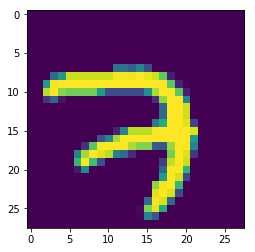

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [14]:
i = 0
first_image = mnist.train.images[i]
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()
mnist.train.labels[i]

In [29]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]), trainable = False)
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]), trainable = False)
}


In [30]:
tf.trainable_variables()

In [31]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer_1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer_1, weights['h2']), biases['h2'])
    out_layer_2 = tf.nn.relu(in_layer2)
    
    in_output_layer = tf.add(tf.matmul(out_layer_2, weights['out']), biases['out'])
    output = in_output_layer
    return output

In [32]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder(tf.int32, [None, n_classes])

In [33]:
pred = forward_propagation(x, weights, biases)

In [34]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))

In [35]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize_step = optimizer.minimize(cost)

In [36]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [37]:
mnist.train.labels.shape

(55000, 10)

In [38]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size) 
        c, _ = sess.run([cost, optimize_step], feed_dict={x:batch_x, y:batch_y})
        total_cost += c
    print(total_cost)

26537.9098128
5766.50108206
3387.3318382
2504.55135788
2130.75709956
1926.33730981
1867.21216451
1610.0365299
1581.4415104
1320.32807225
1366.83565033
1188.91807265
1199.13114045
1095.06931765
1059.70853706
1003.6695878
1019.74468785
937.579188493
871.757929758
876.026023712
745.13245732
789.028003867
752.306259059
790.712772033
746.31623414


In [40]:
predictions = tf.argmax(pred, axis = 1)
actual_labels = tf.argmax(y, axis = 1)
correct_predictions = tf.equal(predictions,actual_labels)

correct_preds = sess.run(correct_predictions, feed_dict={x:mnist.train.images, y:mnist.train.labels} )
correct_preds.sum()

54601

In [41]:
54601/55000

0.9927454545454546